<a href="https://colab.research.google.com/github/SunilKumar-ugra/Attenedence-system/blob/master/Evaluating_Survival_Models_Aids_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.4
    Uninstalling osqp-1.0.4:
      Successfully uninstalled osqp-1.0.4


In [ ]:
from sksurv.datasets import load_aids

data_x, data_y = load_aids()
data_y

array([(False, 189.), (False, 287.), (False, 242.), ..., (False, 272.),
       (False, 192.), (False, 132.)],
      dtype=[('censor', '?'), ('time', '<f8')])

In [ ]:
data_x

,age,cd4,hemophil,ivdrug,karnof,priorzdv,raceth,sex,strat2,tx,txgrp
0,34.0,169.0,0,1,100,39.0,1,1,1,0,1
1,34.0,149.5,0,1,90,15.0,2,2,1,0,1
2,20.0,23.5,1,1,100,9.0,1,1,0,1,2
3,48.0,46.0,0,1,90,53.0,1,1,1,0,1
4,46.0,10.0,0,3,90,12.0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1146,44.0,65.5,0,1,100,103.0,1,1,1,1,2
1147,41.0,7.5,0,1,80,20.0,2,1,0,1,2
1148,43.0,170.0,0,3,90,27.0,2,1,1,0,1
1149,44.0,282.5,0,3,80,12.0,1,1,1,0,1


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data_x)

https://docs.google.com/spreadsheets/d/1fSXpaLjnp-wzpyCMHk2jsPhBhqhB2ougonkM1QGh2d8/edit#gid=0


In [ ]:
import pandas as pd

pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

,censor,time
1,False,285.0
2,False,285.0
3,False,214.0
4,True,206.0
5,False,224.0


Text(0.5, 0, 'time $t$')

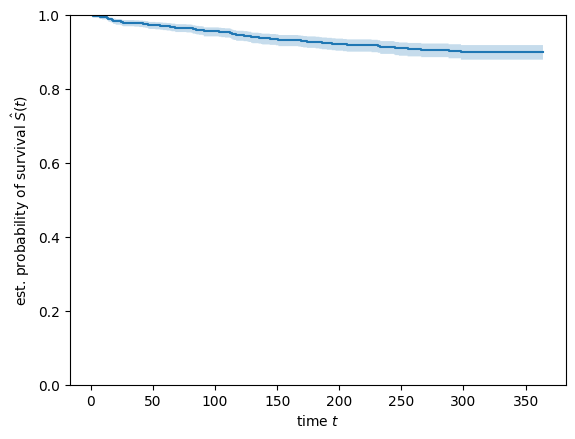

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["censor"], data_y["time"], conf_type="log-log"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")